# Metropolis Hastings algorithm

In [1]:
using Distributions
using CairoMakie
using Random

## Independence sampler

We will use independence sampler to obtain realization from a mixture distribution.

In [2]:
J(x) = exp(-0.5 * (x+1)^2) + exp(-(1/8) * (x-3)^2)

J (generic function with 1 method)

In [3]:
lines(-5..10, J, label = "J(x)", axis = (title = "Independence sampler", xlabel = "x"))
lines!(-5..10, x -> pdf(Normal(1, 3), x), label = "q(x)")
axislegend()

Legend()

Let's create a custom function for this example.

In [4]:
function independence_mixture( m::Int, initial::Float64)
    samples = zeros(m)

    # initial values
    x = initial
    q = Normal(1,3)

    # conditional distributions
    for i = 1:m
        y = rand(q)
        logp = min(log(J(y)) + log(pdf(q, x)) - log(J(x)) - log(pdf(q, y)), 0)
        if rand() <= exp(logp)
            x = y
        end
        samples[i] = x
    end

    return samples
end

independence_mixture (generic function with 1 method)

Let's check convergence.

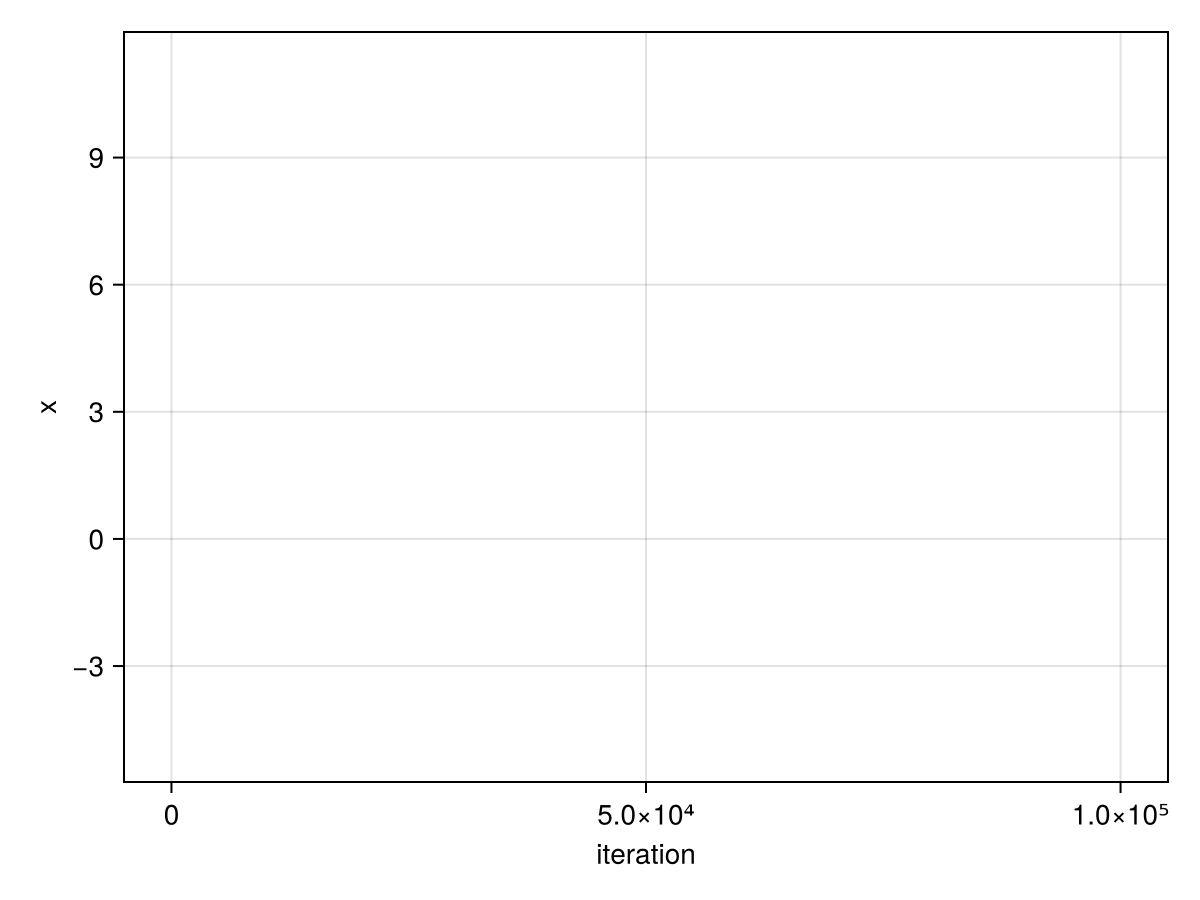

In [5]:
samples = independence_mixture(100000, 0.0)
lines(samples, linewidth = 0.01, axis = (xlabel = "iteration", ylabel = "x"))
# savefig("data/figures/08-independence-traceplot.png")

We can see that the realizations have the shape of a bimodal distribution.

In [6]:
hist(samples, bins = 60, normalization = :pdf, linewidth = 0.2, label = "samples",
    axis = (title = "Independence sampler", xlabel = "x"))
lines!(-6..10, x -> pdf(Normal(1, 3), x), color = :red, label = "q(x)")
axislegend()
# savefig("data/figures/08-independence-histogram.png")

Legend()

## Random walk Metropolis-Hastings

In [7]:
using Distributions
using CairoMakie
using Random

We will use Metropolis-Hastings to obtain realization from a mixture distribution.

In [8]:
J(x) = exp(-0.5 * (x+1)^2) + 1/2*exp(-(1/8) * (x-3)^2)
lines(-5..10, J, label = "J(x)", axis = (title = "Walk Metropolis-Hastings", xlabel = "x"))
lines!(-5..10, x -> pdf(Normal(3.5, 1), x), label = "q(x₀,y)")
vlines!([3.5], linestyle = :dash, color = :black, label = "x₀")
axislegend()

Legend()

Let's create a custom function for this example.

In [9]:
function randomwalk_mixture(m::Int, initial::Float64)
    samples = zeros(m)

    # initial values
    x = initial

    # sampling
    for i = 1:m
        y = rand(Normal(x, 1))
        logp = min(log(J(y)) - log(J(x)), 0)
        if rand() <= exp(logp)
            x = y
        end
        samples[i] = x
    end

    return samples
end

randomwalk_mixture (generic function with 1 method)

Lets evaluate convergence.

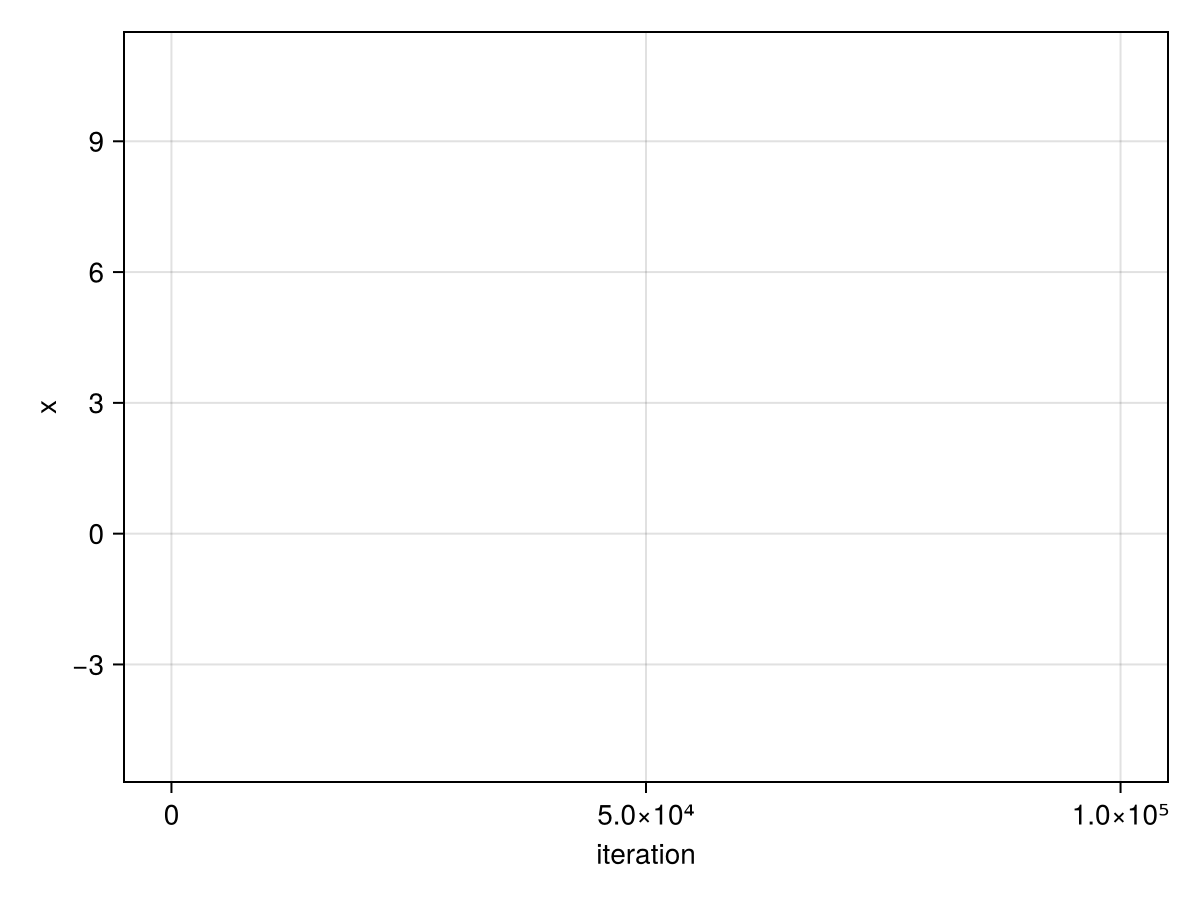

In [10]:
samples = randomwalk_mixture(100000, 0.0)
lines(samples, linewidth = 0.01, axis = (xlabel = "iteration", ylabel = "x"))
# savefig("data/figures/08-randomwalk-traceplot.png")

We can see that the realizations have the shape of a bimodal distribution.

In [11]:
hist(samples, bins = 60, normalization = :pdf, linewidth = 0.2, label = "samples",
    axis = (title = "Random walk Metropolis-Hastings", xlabel = "x"))
lines!(-6..10, x -> pdf(MixtureModel(Normal[Normal(-1.0, 1), Normal(3.0, 2.0)]), x),
    color = :red, label = "q(x)")
axislegend()
# savefig("data/figures/08-randomwalk-histogram.png")

Legend()

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*